In [13]:
import pandas as pd
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
excel_files = glob.glob("*.xlsx")
file = excel_files[0]
df = pd.read_excel(file)

In [3]:
cols = ['Auftrag'] + [col for col in df.columns if col.__contains__('KW')]
df_relevant = df[cols]
print(df_relevant.shape)
for col in df_relevant.columns:
    new_col = col.replace('\n', '_')
    df_relevant.rename(columns={col:new_col}, inplace=True)
df_relevant.head()

(712, 209)


/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_3805/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.rename(columns={col:new_col}, inplace=True)
/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_3805/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_relevant.rename(columns={col:new_col}, inplace=True)
/var/folders/v8/7c18dd3d4l374rkvyrmqy12c0000gn/T/ipykernel_3805/4166342440.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user

,Auftrag,KW 01,KW 02_2020,KW 03_2020,KW 04,KW 05,KW 06,KW 07,KW 08,KW 09,...,2023_KW43,2023_KW44,2023_KW45,2023_KW46,2023_KW47,2023_KW48,2023_KW49,2023_KW50,2023_KW51,2023_KW52
0,Technisches Büro,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SBF Frankfurt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,STB Sontheim,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BA Würzburg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
arbeitsbereiche = ['Kapazität PR-Fertigung', 'Kapazität Fensterfertigung',
                   'Kapazität Türfertigung', 'Kapazität Blechfertigung', 'Kapazität Abt. Schweißen', 'Kapazität Rollen']

row_nums = list()
for ab in arbeitsbereiche:
    rownum = df_relevant.loc[df_relevant['Auftrag'] == ab].index
    row_nums.append(rownum[0])

print(row_nums)

dfs = []
    
df_pr = df_relevant.iloc[row_nums[0]-1:row_nums[0]+1].dropna(axis=1, how='all').transpose().stack().reset_index()[1:]
df_pr.rename(columns={'level_0':'KW', 'level_1': 'category', 0: 'value'}, inplace=True)
df_pr.replace(208, 'Kapazität', inplace=True)
df_pr.replace(207, 'Auslastung', inplace=True)
dfs.append(df_pr)

df_f = df_relevant.iloc[row_nums[1]-1:row_nums[1]+1].dropna(axis=1, how='all').transpose()[1:].stack().reset_index()[1:]
df_f.rename(columns={'level_0':'KW', 'level_1': 'category', 0: 'value'}, inplace=True)
df_f.replace(281, 'Kapazität', inplace=True)
df_f.replace(282, 'Auslastung', inplace=True)
dfs.append(df_f)

df_t = df_relevant.iloc[row_nums[2]-1:row_nums[2]+1].dropna(axis=1, how='all').transpose()[1:].stack().reset_index()[1:]
df_t.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_t.replace(345, 'Kapazität', inplace=True)
df_t.replace(346, 'Auslastung', inplace=True)
dfs.append(df_t)

df_b = df_relevant.iloc[row_nums[3]-1:row_nums[3]+1].dropna(axis=1, how='all').transpose()[1:].stack().reset_index()[1:]
df_b.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_b.replace(391, 'Kapazität', inplace=True)
df_b.replace(392, 'Auslastung', inplace=True)
dfs.append(df_b)

df_s = df_relevant.iloc[row_nums[4]-1:row_nums[4]+1].dropna(axis=1, how='all').transpose()[1:].stack().reset_index()[1:]
df_s.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_s.replace(402, 'Kapazität', inplace=True)
df_s.replace(403, 'Auslastung', inplace=True)
dfs.append(df_s)

df_r = df_relevant.iloc[row_nums[5]-1:row_nums[5]+1].dropna(axis=1, how='all').transpose()[1:].stack().reset_index()[1:]
df_r.rename(columns={'level_0': 'KW',
            'level_1': 'category', 0: 'value'}, inplace=True)
df_r.replace(449, 'Kapazität', inplace=True)
df_r.replace(450, 'Auslastung', inplace=True)
dfs.append(df_r)

[208, 282, 346, 392, 403, 450]


In [59]:
len(dfs)

6

In [60]:
dfs[0].KW.value_counts()

2022_KW34    2
2023_KW09    2
2023_KW03    2
2023_KW04    2
2023_KW05    2
            ..
2021_KW49    1
2021_KW48    1
2021_KW47    1
2021_KW46    1
KW 01        1
Name: KW, Length: 141, dtype: int64

In [77]:
today = datetime.today()
print('Year: ', today.year)
print('Week: ', today.isocalendar().week)
type(today.isocalendar().week)

def get_kw_names(number_of_keys:int):
    if 52 - today.isocalendar().week - number_of_keys > 0:
        return [str(today.year) + '_KW' + str(i)
               for i in range(today.isocalendar().week, today.isocalendar().week + number_of_keys)]
    elif number_of_keys - 51 + today.isocalendar().week < 10:
        kws = [str(today.year) + '_KW' + str(i) for i in range(today.isocalendar().week, 53)] + \
            [str(today.year + 1) + '_KW0' + str(i)
             for i in range(1, number_of_keys - 51 + today.isocalendar().week)]
        return kws
    else:
        kws = [str(today.year) + '_KW' + str(i) for i in range(today.isocalendar().week, 53)] + \
            [str(today.year + 1) + '_KW0' + str(i) for i in range(1, 10)] + \
            [str(today.year + 1) + '_KW' + str(i) for i in range(10, number_of_keys - 52 + today.isocalendar().week)]
        return kws

kws = get_kw_names(20)
print(kws, len(kws))

Year:  2022
Week:  48
['2022_KW48', '2022_KW49', '2022_KW50', '2022_KW51', '2022_KW52', '2023_KW01', '2023_KW02', '2023_KW03', '2023_KW04', '2023_KW05', '2023_KW06', '2023_KW07', '2023_KW08', '2023_KW09', '2023_KW10', '2023_KW11', '2023_KW12', '2023_KW13', '2023_KW14', '2023_KW15'] 20


In [82]:
dfs[1].value.value_counts()

0.00      97
335.70    27
297.70    10
344.20     4
364.20     2
          ..
187.30     1
133.15     1
207.30     1
47.17      1
290.10     1
Name: value, Length: 86, dtype: int64

In [83]:
caps = [100, 400, 180, 50, 80, 40]

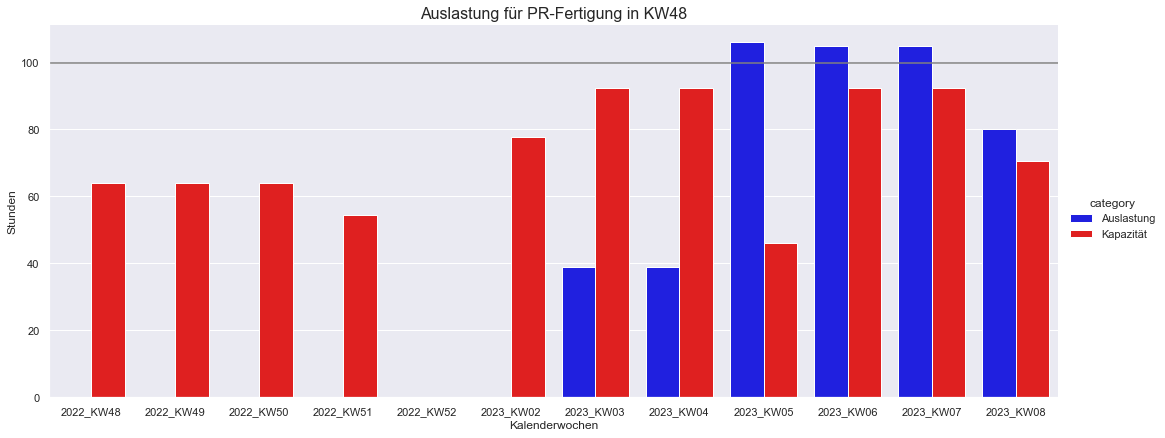

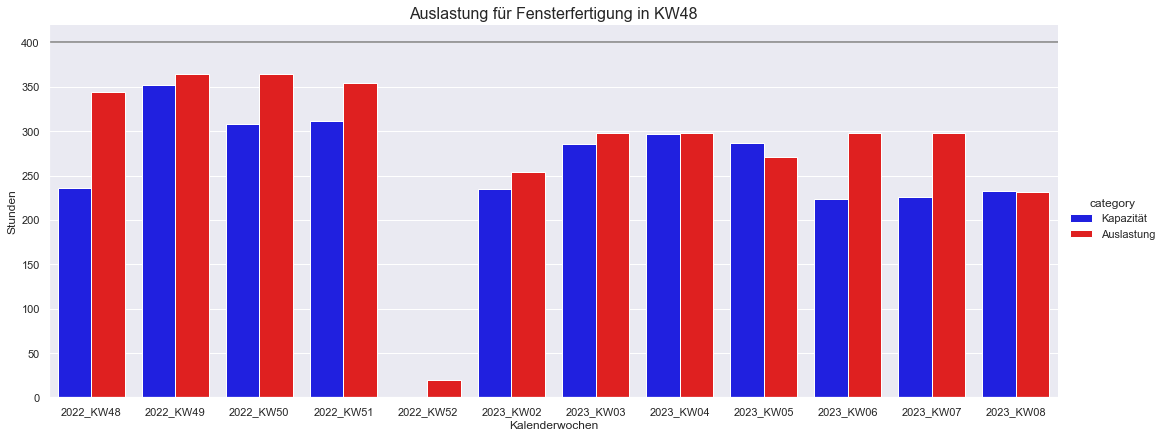

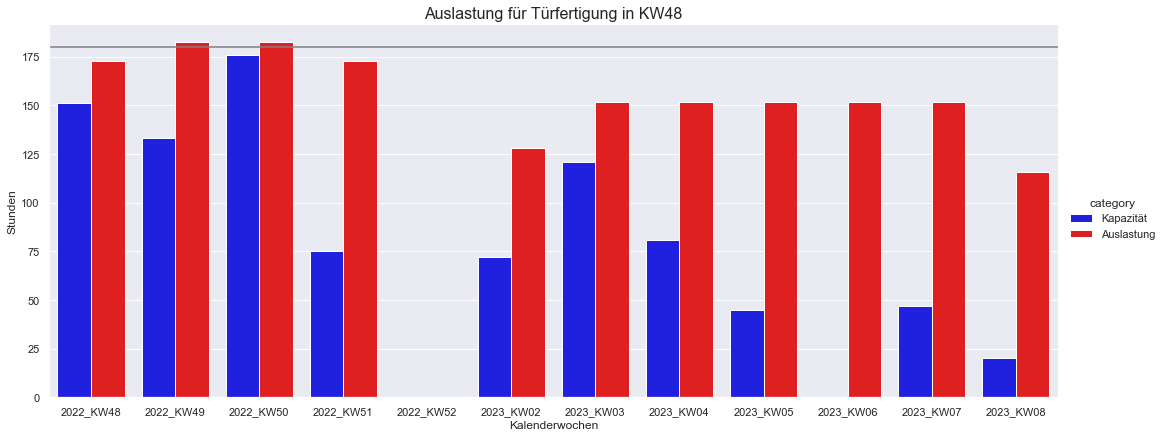

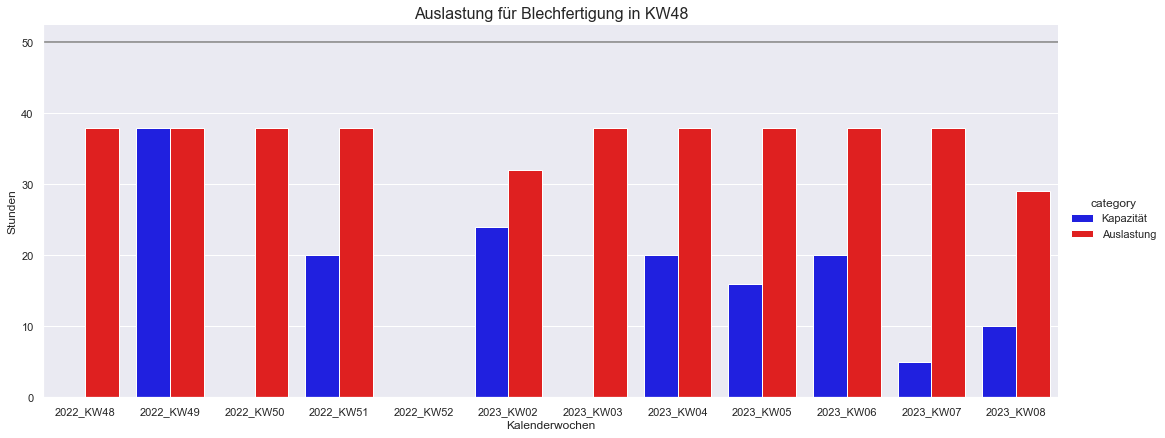

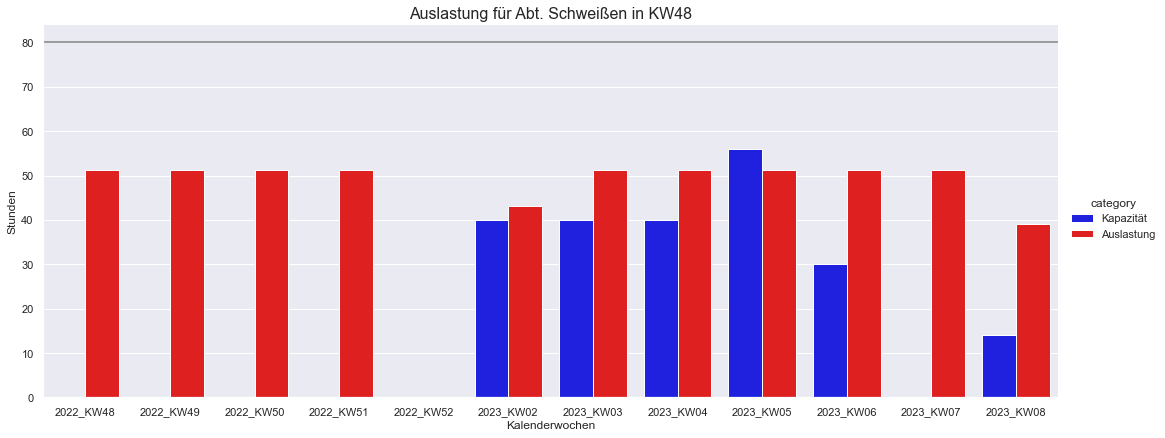

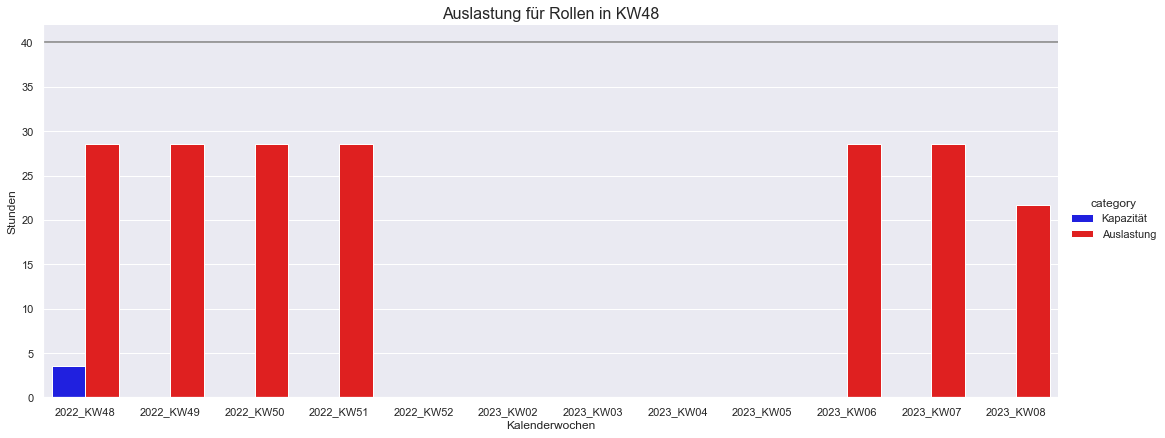

In [87]:
def plot_abteilung(abteilung, data, capacity):
    sns.set(rc={'figure.figsize': (11.7, 8.27)})
    sns.catplot(data=data, 
                kind='bar', 
                x='KW', 
                y='value', 
                hue='category', 
                height=6, 
                aspect=2.5,
                palette=sns.color_palette(['blue', 'red']))
    plt.title(f'Auslastung für {abteilung[10:]} in KW{today.isocalendar().week}', size=16)
    plt.ylabel('Stunden')
    plt.xlabel('Kalenderwochen')
    plt.axhline(capacity, c='gray')
    plt.savefig(f'./grafiken/Grafik_{abteilung[10:]}_KW{today.isocalendar().week}.png')


for df_nr, abt in enumerate(arbeitsbereiche):
    plot_abteilung(
        abteilung=abt, 
        data=dfs[df_nr].loc[dfs[df_nr].KW.isin(get_kw_names(12))],
        capacity=caps[df_nr])